# CHAPMAN-RICHARDS FUNCTION, TO MODEL THE ABSORBED CO2 OF SOFTWOOD 

In [1]:
import numpy as np
import math

import plotly.graph_objects as go
import plotly
# from IPython.display import display, HTML

# plotly.offline.init_notebook_mode()
# display(HTML(
#     '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
# ))

In [2]:
# year_k: year of plantation setting
# year_j: year in which we are evaluating the sequestration

In [3]:
# growing rate [kg of wood per year]
# n = years
# p = parameter describing catabolism of the three = 3
# k = paramenter describing growth rate = 0.23

def fCR(n, k, p):
    fCR = k*p*math.exp(-k*n)*(1-math.exp(-k*n))**(p-1)
    return fCR

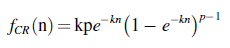

In [19]:
fig = go.Figure()


yj = np.linspace(0, 80, 81)

fCR_vector = []
for i in yj:
    fCR_vector.append(fCR(i, 0.23, 3))

fig.add_trace(go.Scatter(x=yj, y=fCR_vector, mode='lines', line=dict(color="black")))

fig.update_xaxes(range=(0,85))
# Aggiunta di titolo e etichette agli assi
fig.update_layout(margin=dict(l=100, r=100, t=50, b=50), 
                  template = "plotly_white", 
                  width = 1000,
                  height = 600)

fig.update_layout(
    xaxis=dict(
        tickfont=dict(size=20),  
        title=dict(text="Time after planting [year]", font=dict(size=25))  
    ),
    yaxis=dict(
        tickfont=dict(size=20),  
        title=dict(text="Growth rate", font=dict(size=25)) 
    )
)

fig.show()
fig.write_image(r'C:\Users\frafr\OneDrive\Documenti\Polimi Magistrale\Tesi\word tesi\plots\deriv Chapman Richards.png', scale=5)

In [4]:
# integral of the fCR --> chapman richards 
# mass of growing tree. 0->planted tree, 1->fully grown tree
yj = np.linspace(0, 80, 81)
yk = 0 # year of plantation

AboveGroundCarbon = 0
AboveGroundCarbon_vector = []
for i in range(len(yj)): 
    DeltaYears = yj[i]-yk
    AboveGroundCarbon = AboveGroundCarbon + fCR(DeltaYears, 0.23, 3)
    AboveGroundCarbon_vector.append(AboveGroundCarbon)

In [18]:
fig = go.Figure()


yj = np.linspace(0, 80, 81)

fig.add_trace(go.Scatter(x=yj, y=AboveGroundCarbon_vector, mode='lines', line=dict(color="black")))

fig.update_xaxes(range=(0,85))
# Aggiunta di titolo e etichette agli assi
fig.update_layout(margin=dict(l=100, r=100, t=50, b=50), 
                  template = "plotly_white", 
                  width = 1000,
                  height = 600)

fig.update_layout(
    xaxis=dict(
        tickfont=dict(size=20),  
        title=dict(text="Time after planting [year]", font=dict(size=25))  
    ),
    yaxis=dict(
        tickfont=dict(size=20),  
        title=dict(text="Growth function", font=dict(size=25)) 
    )
)

fig.show()
fig.write_image(r'C:\Users\frafr\OneDrive\Documenti\Polimi Magistrale\Tesi\word tesi\plots\chapman richards.png', scale=5)

In [5]:
# M_anydrewood = mass of dry wood
# V_woodproduct = cubic meters of wood product at year_k
# rho_woodproduct = density of the wood product 
# tau = tau wood/woodproduct = percentage of wood in the product, exclusion of humidity
def AnydreMass(V_woodproduct, rho_woodproduct, tau):
    M_anydrewood = V_woodproduct * rho_woodproduct * tau
    return M_anydrewood

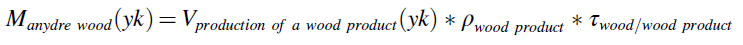

The mass of dry wood has been calculated by multiplying the volume of wood (V = 1 m3) by the density of the wood (ρ = 550 kg/m3) and by 0.8, considering that the wood used has a humidity of 20%.

In [6]:
# m_CO2_sequestr: mass of instantaneous sequestred CO2 in year_j by a plantation set in year_k
# formula multiplies fCR and M_anydrewood and normalizes it to account for a rotation period of 80 years with 0<=year_k<=year_j 
# 50% of the wood mass comes from CO2 sequestred 
def CO2mass(year_j, year_k, V_woodproduct, rho_woodproduct, tau, k, p): 
    M_anydrewood_yk = AnydreMass(V_woodproduct, rho_woodproduct, tau)
    fCR_Deltayear = fCR((year_j-year_k), k, p)

    # sum of all fCR from yk to yk+ 80
    sum_fCR = 0
    yk = 0
    for yj in range(yk, yk+80):
        sum_fCR = sum_fCR + fCR((yj-yk), k, p)

    m_CO2_seq = M_anydrewood_yk*0.5*(44/12)*fCR_Deltayear/sum_fCR
    return m_CO2_seq

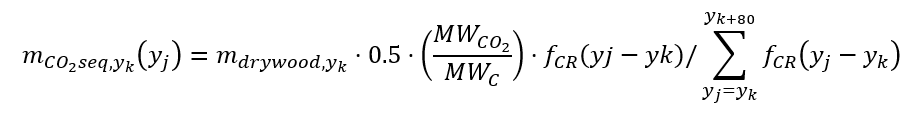

In [21]:
fig = go.Figure()


yj = np.linspace(0, 80, 81)
# mCO2_seq = CO2mass(yj, 0, 1, 550, 0.8, 0.23, 3)

CO2mass_vector = []
for i in yj:
    CO2mass_vector.append(CO2mass(i, 0, 1, 550, 0.8, 0.23, 3))

fig.add_trace(go.Scatter(x=yj, y=CO2mass_vector, mode='lines', line=dict(color="black")))

fig.update_xaxes(range=(0,85))
# Aggiunta di titolo e etichette agli assi
fig.update_layout(margin=dict(l=100, r=100, t=50, b=50), 
                  template = "plotly_white", 
                  width = 1000,
                  height = 600)

fig.update_layout(
    xaxis=dict(
        tickfont=dict(size=20),  
        title=dict(text="Time after planting [year]", font=dict(size=25))  
    ),
    yaxis=dict(
        tickfont=dict(size=20),  
        title=dict(text="Inst. mass of CO2 [kg]", font=dict(size=25)) 
    )
)

fig.show()
fig.write_image(r'C:\Users\frafr\OneDrive\Documenti\Polimi Magistrale\Tesi\word tesi\plots\CO2_mass_sequestration_rate2.png', scale=5)

In [22]:
fig = go.Figure()

MassCO2abs_integral = 0
MassCO2abs_integral_vector = []
for inst_uptake in CO2mass_vector:
    MassCO2abs_integral = MassCO2abs_integral + inst_uptake 
    MassCO2abs_integral_vector.append(MassCO2abs_integral)

fig.add_trace(go.Scatter(x=yj, y=MassCO2abs_integral_vector, mode='lines', line=dict(color="black")))

fig.update_xaxes(range=(0,85))

fig.update_layout(margin=dict(l=100, r=100, t=50, b=50), 
                  template = "plotly_white", 
                  width = 1000,
                  height = 600)

fig.update_layout(
    xaxis=dict(
        tickfont=dict(size=20),  
        title=dict(text="Time after planting [year]", font=dict(size=25))  
    ),
    yaxis=dict(
        tickfont=dict(size=20),  
        title=dict(text="Cum. mass of CO2 [kg]", font=dict(size=25)) 
    )
)

fig.show()
fig.write_image(r'C:\Users\frafr\OneDrive\Documenti\Polimi Magistrale\Tesi\word tesi\plots\CO2_mass_sequestration2.png', scale=5)

In [10]:
# total CO2 absorbed in 80 years
np.sum(CO2mass_vector)


806.6666723497544

from our wood volume we have to remove humidity because water does not absorb CO2

Larix decidua is a softwood growing very fast in the early years of life, it's then explained the the peak in the plot of the annual growth [https://it.wikipedia.org/wiki/Larix_decidua]

After 20 years a steady state is reached (null growing), the only CO2 absorbed is that to allow plant "breathing"

In [11]:
# temporal distribution. To evaluate 80 years of life and account for year 0, the last value has not been considered
td_vector = np.linspace(0, 80, 81, dtype = int)*360-9
print(td_vector)

[   -9   351   711  1071  1431  1791  2151  2511  2871  3231  3591  3951
  4311  4671  5031  5391  5751  6111  6471  6831  7191  7551  7911  8271
  8631  8991  9351  9711 10071 10431 10791 11151 11511 11871 12231 12591
 12951 13311 13671 14031 14391 14751 15111 15471 15831 16191 16551 16911
 17271 17631 17991 18351 18711 19071 19431 19791 20151 20511 20871 21231
 21591 21951 22311 22671 23031 23391 23751 24111 24471 24831 25191 25551
 25911 26271 26631 26991 27351 27711 28071 28431 28791]


In [12]:
# normalization by the total amount to use it in the bw_temporalis TemporalDistribution
MassCO2abs_normalized = []
for i in range(len(CO2mass_vector)):
    MassCO2abs_normalized.append(CO2mass_vector[i]*(1/np.sum(CO2mass_vector)))